# Histoire des bornes électriques en France

Dans un pays où les ruelles pavées racontent des siècles d'histoires, une nouvelle énergie s'est discrètement frayée un chemin. Au cœur de ce paysage chargé d'histoire, des lumières éclatent dans une symphonie moderne : **les bornes électriques**.

Ces sentinelles silencieuses, disséminées à travers la France, sont les pionnières d'une révolution discrète mais palpable. Elles témoignent de l'ère où la mobilité électrique éclipse doucement les moteurs à combustion.

À travers cette toile d'innovation et de progrès, se dessinent des histoires fascinantes. Les données qui les animent révèlent bien plus que des chiffres : elles narrent l'évolution d'une nation vers la durabilité. Elles dévoilent les tendances urbaines, les mentalités changeantes et les routes nouvelles qui s'ouvrent au futur.

Au-delà des nombres et des cartes, cette base de données des bornes électriques révèle un pays en mutation, où le souffle de l'écologie rencontre l'élan de la technologie. Elle nous invite à décrypter les signes d'une transition énergétique en marche, où chaque borne devient un jalon vers un avenir plus propre et plus prometteur.

Explorez ces données et vous découvrirez bien plus qu'une simple répartition géographique. Vous découvrirez une histoire moderne en construction, où les bornes électriques sont les joyaux lumineux d'une transformation nationale vers un avenir plus durable et conscient.

## La Cartographie Lumineuse de notre Avenir
Dans cette odyssée à travers les données des bornes électriques en France, nous tracerons le chemin vers la compréhension de cette révolution discrète mais capitale. Tel des explorateurs modernes, nous naviguerons à travers les segments clés pour dévoiler les secrets que renferment ces points lumineux disséminés à travers le pays.

### 1. Éclairage Initial - Introduction aux données et nettoyage
Dans le halo des premières données, nous dévoilerons les contours de cette constellation d'énergie. Nous plongerons dans la répartition géographique, révélant les foyers lumineux et les zones d'ombre de cette transformation.

### 2. Esquisses Historiques - Exploration des données historiques
À travers les méandres du temps, nous éclairerons les évolutions passées. Ces lignes temporelles dessineront les progrès réalisés, les avancées technologiques et les métamorphoses urbaines qui ont façonné ce paysage lumineux.

### 3. Fresque Énergétique - Analyse exploratoire des données
Dans cette toile de chiffres et de courbes, nous peindrons les tendances énergétiques. Nous décrypterons les patterns, les pics d'activité et les variations saisonnières pour comprendre les flux d'énergie qui alimentent ces bornes.

### 4. Horizons Durables
Tournant nos regards vers l'avenir, nous esquisserons les chemins vers une mobilité plus verte. Nous éluciderons les potentiels inexplorés, les projections de croissance et les perspectives de développement durable.

### 5. Conclusion Éblouissante
En un final éclatant, nous rassemblerons les lueurs d'informations glanées. Ces constellations de données nous guideront vers des réflexions clés et des perspectives brillantes pour une France électrifiée, éclairée vers un futur plus lumineux.

### 6. Bibliographie 

---------------------------------------------------------------------

## 1. Éclairage Initial - Introduction aux données et nettoyage

#### 1.1. Import des modules utilisés dans ce notebook

Nous importons dans un premier temps quelques module qui nous serviront tout au long de notre analyse

In [1]:
# Nous avons besoins d'importer quelques modules 
import pandas as pd 
import numpy as np 
import geopandas as gpd 
import matplotlib.pyplot as plt 
import folium
import seaborn as sns
import requests 
import re
import os
import sys
from datetime import datetime
import plotly.express as px
import time

On importe également le module CarNetwork.py sur lequel repose massivement notre projet. 

In [2]:
car_network_directory = '/Users/khelifanail/Documents/GitHub/Pycar/Modules'

## si Augustin utilise le chemin absolu est '/Users/augustincablant/Documents/GitHub/Pycar/Modules' 

sys.path.append(car_network_directory)

from CarNetwork import CarNetwork

#### 1.2. Construction de la base de donées et nettoyage de celle-ci

Le jeu de données que nous allons utiliser date du 23 juillet 2023, vous pouvez le retrouver sur cette [page](https://www.data.gouv.fr/fr/datasets/bornes-de-recharge-pour-vehicules-electriques-3/).

Pour des raisons pratiques, nous avons inclu cette base de donnée en **attribut** la classe que nous avons construit pour notre étude. C'est pourquoi nous instancions d'abord un objet vide de notre classe pour récupérer celle-ci.

In [5]:
# On commence par récupérer notre data set 
URL = 'https://www.data.gouv.fr/fr/datasets/r/517258d5-aee7-4fa4-ac02-bd83ede23d25'
df = pd.read_csv(URL, sep = ';')

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

La cellule de code suivant nous permet de nous faire une idée quant au contenu de la base de donnée. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18142 entries, 0 to 18141
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   n_amenageur         18136 non-null  object 
 1   n_operateur         18133 non-null  object 
 2   n_enseigne          17917 non-null  object 
 3   id_station          17697 non-null  object 
 4   n_station           18071 non-null  object 
 5   ad_station          18079 non-null  object 
 6   code_insee          16590 non-null  float64
 7   xlongitude          18112 non-null  float64
 8   ylatitude           18136 non-null  float64
 9   nbre_pdc            16410 non-null  float64
 10  id_pdc              18142 non-null  object 
 11  puiss_max           18005 non-null  float64
 12  type_prise          18138 non-null  object 
 13  acces_recharge      18134 non-null  object 
 14  accessibilite       18050 non-null  object 
 15  observations        13225 non-null  object 
 16  date

On s'aperçoit, comme l'illustre la cellule de code suivante, que les catégories proposées ne sont pas très propres dans la colonne *acces_recharge*. Remédions à cela.

In [8]:
list(df['acces_recharge'].unique())

['gratuit',
 'payant',
 'Payant',
 'Carte Mobive',
 nan,
 'Gratuit',
 'GRATUIT',
 'gratuit pour la clientèle du parking',
 '0.19€/kWh + 0.01€/min',
 'QR code / appli mobile / Carte RFID',
 'badge RFID; QR Code',
 'Payant (badge, appli et QR code)',
 'Public payant',
 'Accès payant (Badge RFID, application, site web paynow.sodetrel.fr, badges vendus en boutique)',
 'Charges gratuites de 12 à 14h et de 19h à 21h',
 'oui',
 '5€ / 45min, si abonné (10€/mois) : 1€/10min',
 'Réservation préalable, accès par badge',
 '2€/recharge',
 '2€/recharge+ prix du stationnement']

In [9]:
# On définit une fonction chargée de nettoyer une colonne du DataFrame
def transform_acces(row):

    if not pd.isna(row):  # On ne peut rien dire des nan
        row = row.lower()  # Mettre en lettre minuscule 
        mots = row.split(' ')
        if 'payant' in mots: row = 'payant'
        elif 'gratuit' in mots: row = 'gratuit'
        for mot in mots: 
            if len(mot.split('€'))>1: row = 'payant'
            if mot=='carte' or mot=='badge': row = 'carte ou badge'
            if mot=='oui': row = 'information manquante'
        #else: row = 'accès spécial'
    else: row = 'information manquante'
    return row


df['acces_recharge'] = df['acces_recharge'].apply(transform_acces)
list(df['acces_recharge'].unique())

['gratuit',
 'payant',
 'carte ou badge',
 'information manquante',
 'charges gratuites de 12 à 14h et de 19h à 21h']

Notre premier objectif étant de représenter la répartition des bornes en France, on veut ensuite s'assurer que nous disposons de toutes les informations concernant les coordonénes géographiques des bornes de recharge ...

In [10]:
print('Il y a ', df[df['xlongitude'].isna()].shape[0], 'valeurs manquantes pour xlongitude')
print('Il y a ', df[df['ylatitude'].isna()].shape[0], 'valeurs manquantes pour ylatitude')

Il y a  30 valeurs manquantes pour xlongitude
Il y a  6 valeurs manquantes pour ylatitude


D'où la cellule de nettoyage suivante

In [11]:
droping_liste = list(set(df[df['xlongitude'].isna()].index.to_list() + df[df['ylatitude'].isna()].index.to_list()))
df.drop(droping_liste, inplace = True)

#### 1.3. Première étude de la répartition des bornes en France

Dans le cadre de notre analyse de la répartition des bornes en France, nous nous intéressons principalement aux colonnes *region* et *nombre de bornes. D'abord d'un point de vue statistique, on a l'approche dans la cellule suivante : 

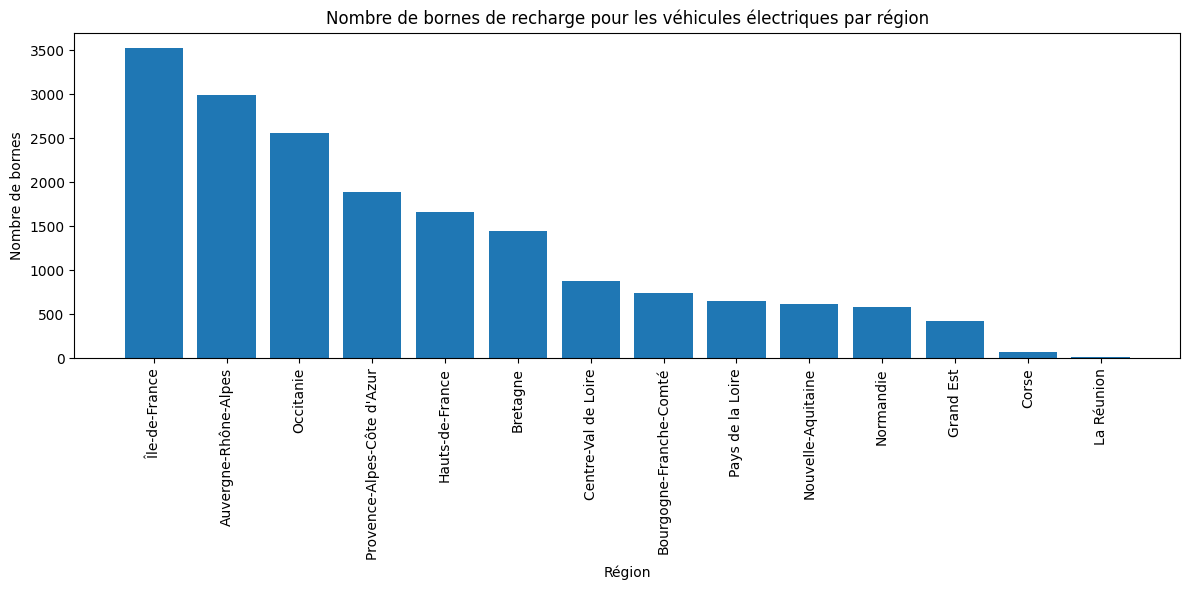

In [4]:
# On compte le nombre de bornes par région
bornes_region = df['region'].value_counts().reset_index()  

# On renomme les colonnes du DataFrame ainsi formé
bornes_region.columns = ['region', 'nombre de bornes']

# On réordonne le DataFrame selon le nombre de bornes par région, dans l'ordre décroissant
bornes_region = bornes_region.sort_values(by='nombre de bornes', ascending=False)

# On affiche tout cela dans un histogramme 
plt.figure(figsize=(12, 6))
plt.bar(bornes_region['region'], bornes_region['nombre de bornes'])
plt.xlabel('Région')
plt.ylabel('Nombre de bornes')
plt.title('Nombre de bornes de recharge pour les véhicules électriques par région')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Ensuite, d'un point de vue davantage visuel : 